https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('Healthcare-Diabetes.csv')

print("Назви колонок:")
print(df.columns.tolist())

print("\nРозмір датасета:")
print(df.shape)

Назви колонок:
['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Розмір датасета:
(2768, 10)


In [16]:
df = df.drop(columns=['Id'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
print("Кількість пропусків у кожному стовпці:")
print(df.isnull().sum())


Кількість пропусків у кожному стовпці:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


пропусків немає

Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції
ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
обмежитися декількома)

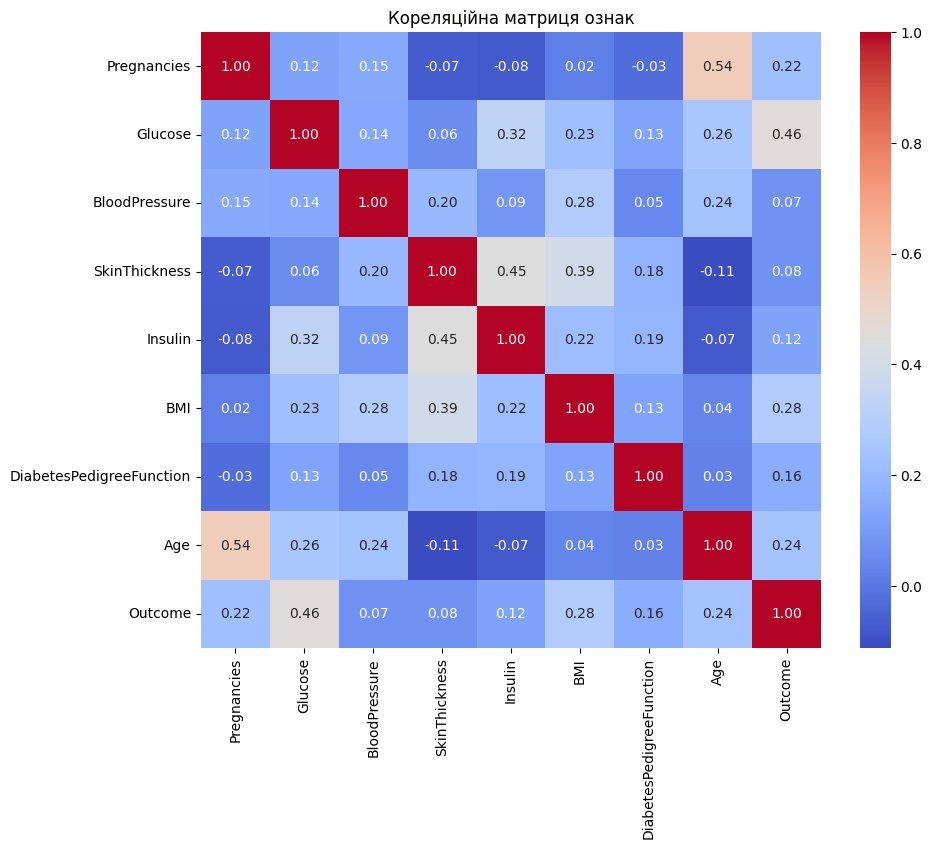

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця ознак")
plt.show()

In [19]:
selected_features = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', "Outcome"]

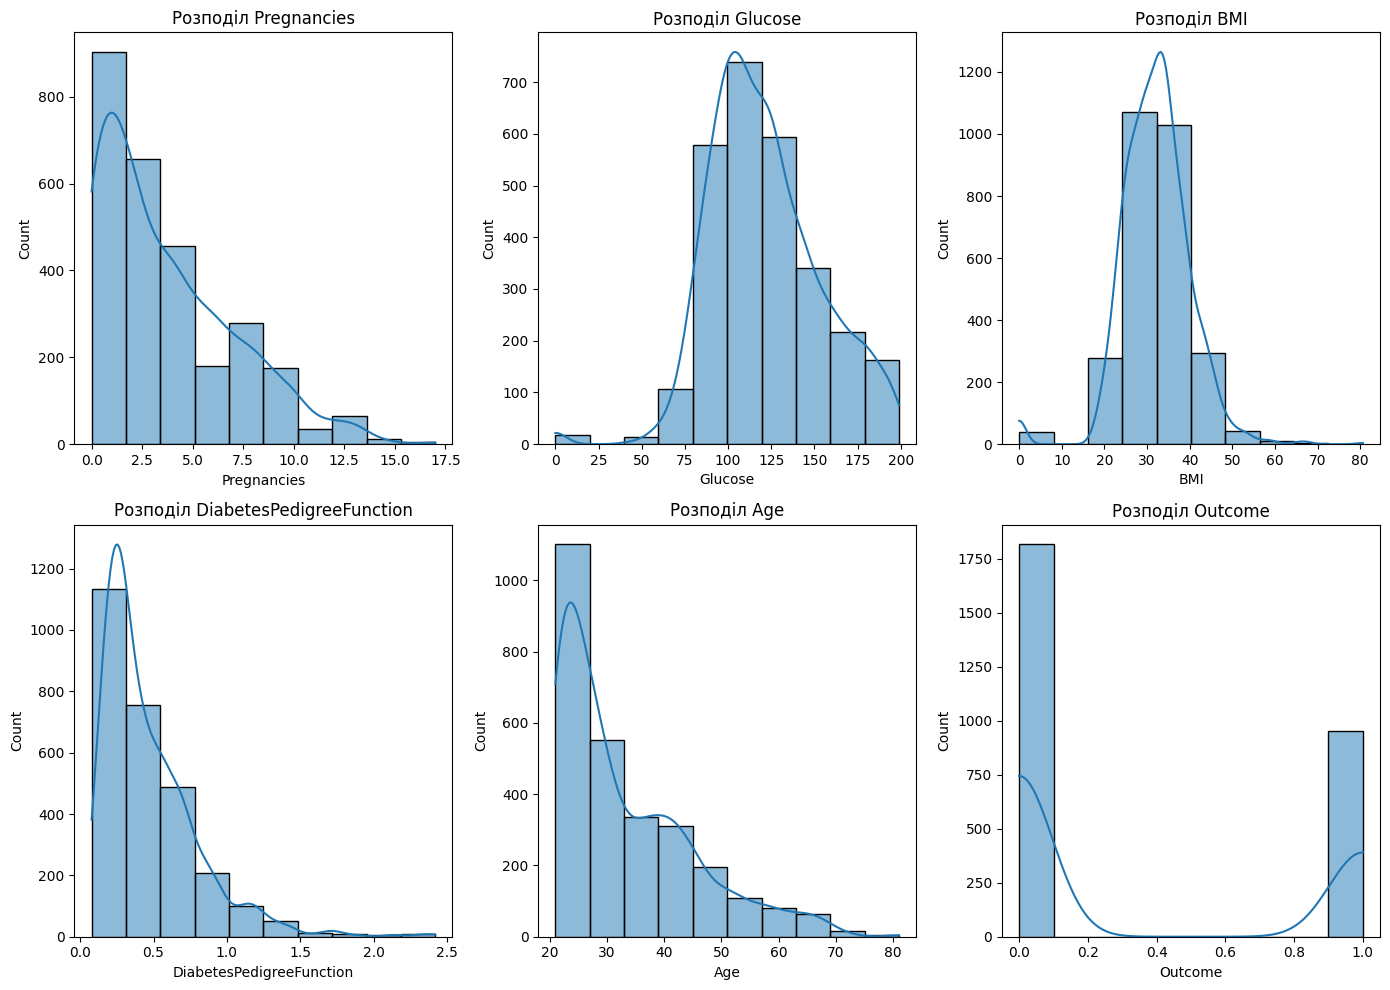

In [20]:


# Підготовка фігури для гістограм
plt.figure(figsize=(14, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=10)
    plt.title(f'Розподіл {feature}')

plt.tight_layout()
plt.show()

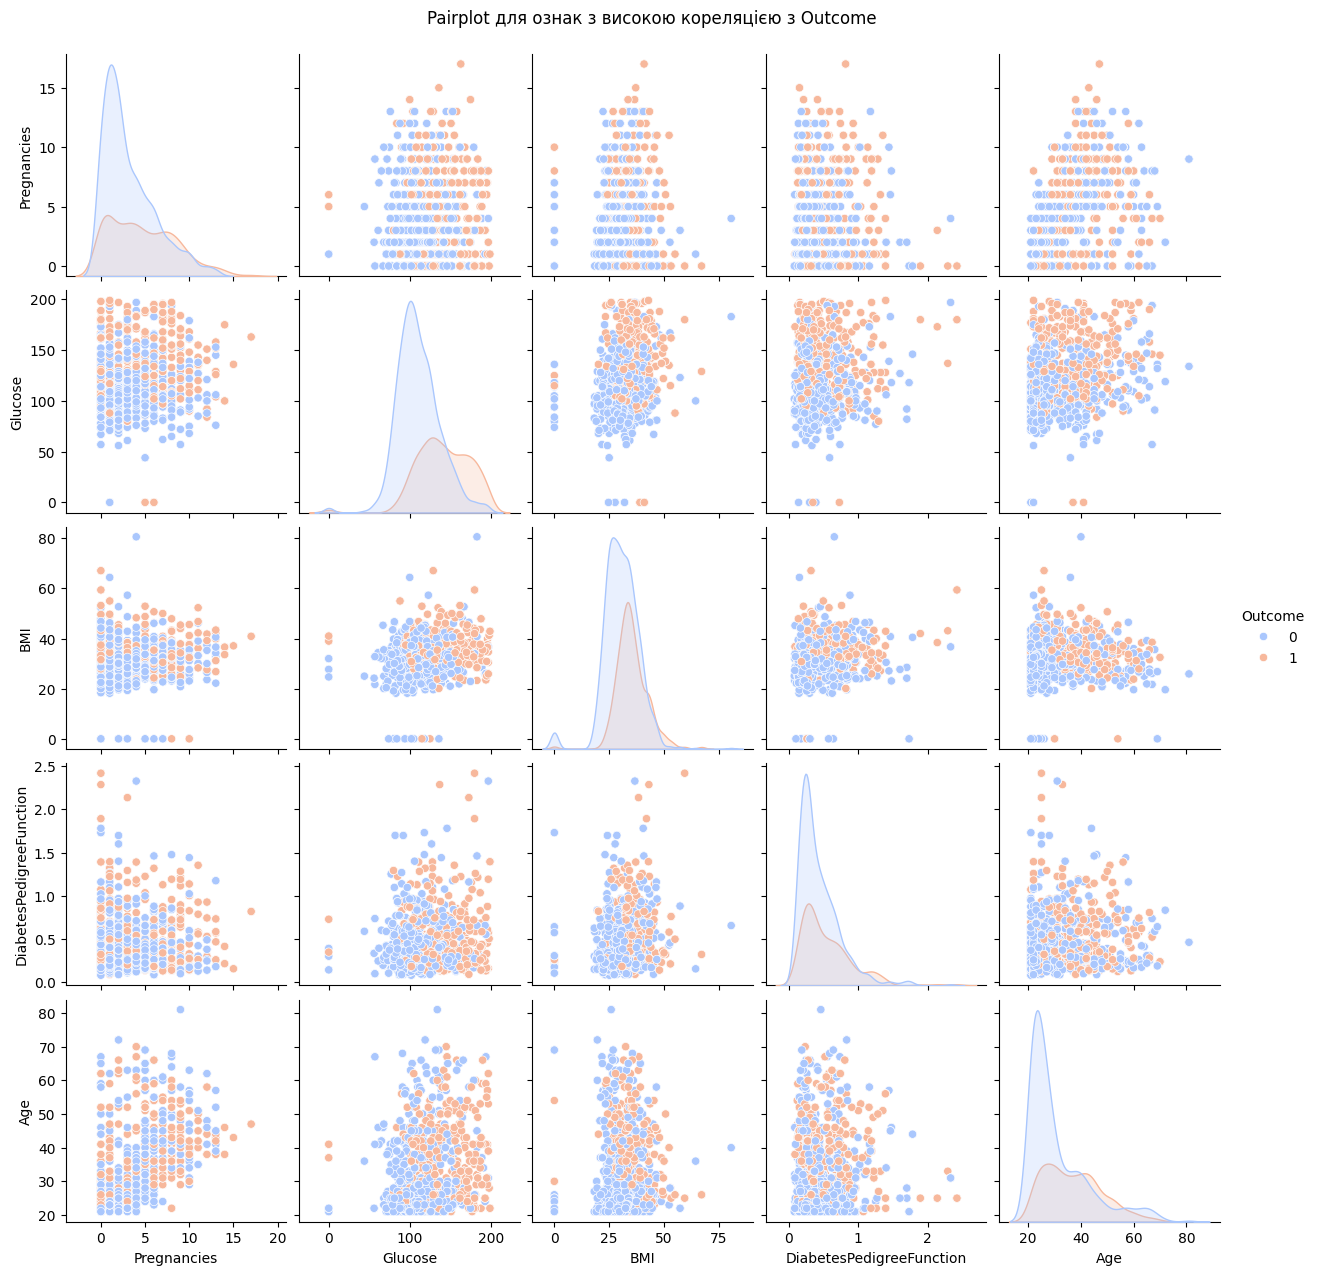

In [21]:
sns.pairplot(df[selected_features], hue="Outcome", diag_kind="kde", palette="coolwarm")
plt.suptitle("Pairplot для ознак з високою кореляцією з Outcome", y=1.02)
plt.show()

/tmp/ipykernel_81512/1673061247.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette="coolwarm")


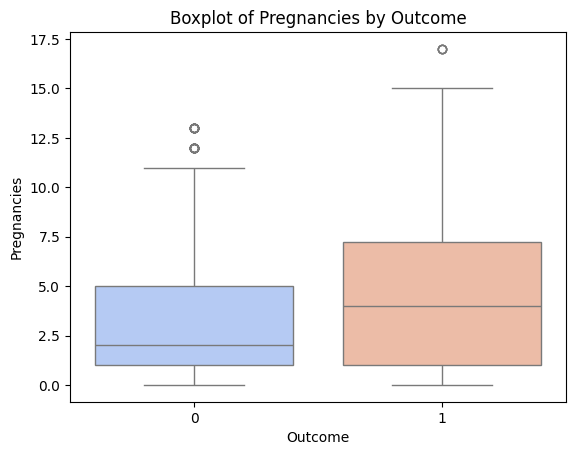

/tmp/ipykernel_81512/1673061247.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette="coolwarm")


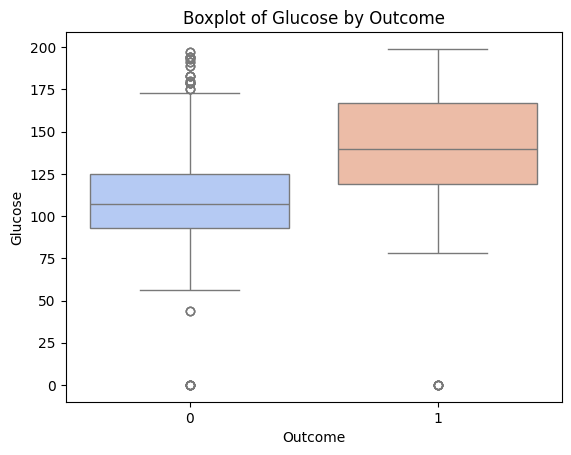

/tmp/ipykernel_81512/1673061247.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette="coolwarm")


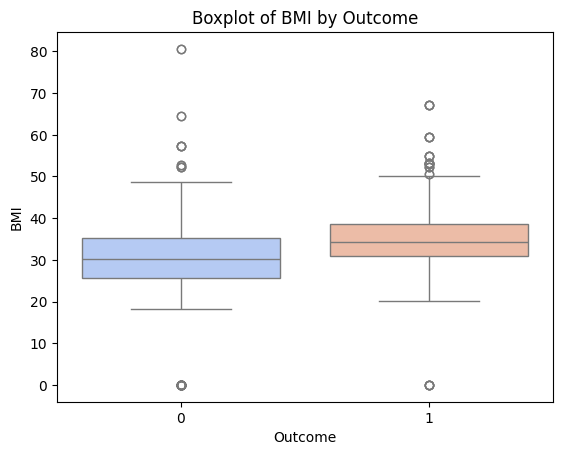

/tmp/ipykernel_81512/1673061247.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette="coolwarm")


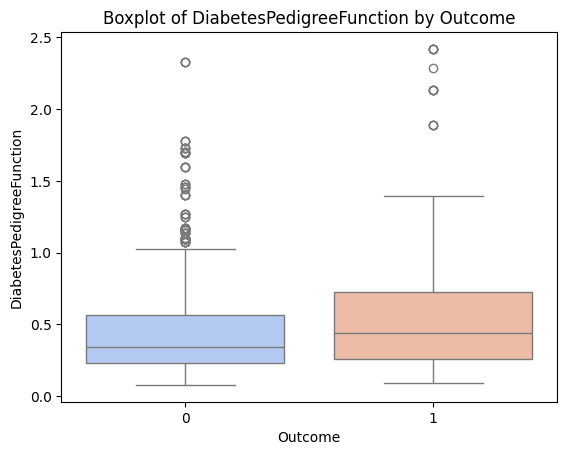

/tmp/ipykernel_81512/1673061247.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette="coolwarm")


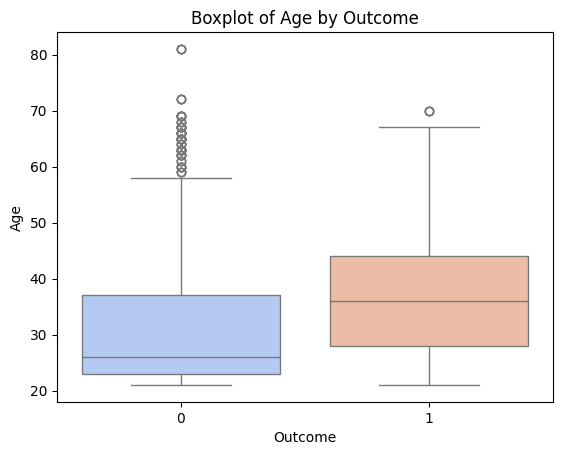

In [23]:
for feature in selected_features:
    # plt.figure(figsize=(6, 4))
    if feature != 'Outcome':
        sns.boxplot(x='Outcome', y=feature, data=df, palette="coolwarm")
        plt.title(f'Boxplot of {feature} by Outcome')
        plt.xlabel('Outcome')
        plt.ylabel(feature)
        plt.show()

Нормалізація

In [26]:
from sklearn.preprocessing import StandardScaler

X = df_selected.drop(columns=['Outcome'])
y = df_selected['Outcome']

# Ініціалізація та застосування StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Створимо DataFrame з нормалізованими даними
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Outcome'] = y.values  # Додаємо стовпець "Outcome" назад

# Перегляд перших рядків
df_scaled.head()


NameError: name 'df_selected' is not defined